In [ ]:
# # %%
# # this worked but took sometime for 1 file
# import pandas as pd
# import re
# # from itertools import islice

# def load_data(file_path):
#     current_movie_id = None
#     data = []

#     with open(file_path, 'r') as file:
#         for line in file:
            
#             if ':' in line:
#                 current_movie_id = int(line.strip()[:-1])
#             else:
#                 customer_id, rating, date = line.strip().split(',')
#                 data.append([current_movie_id, int(customer_id), int(rating), date])
        
#     # Create a DataFrame
#     columns = ['MovieID', 'CustomerID', 'Rating', 'Date']
#     df = pd.DataFrame(data, columns=columns)

#     # Parse 'Date' column as datetime
#     df['Date'] = pd.to_datetime(df['Date'])

#     return df

# file_path = 'data/combined_data_1.txt'
# df = load_data(file_path)

# print(df.head())


In [ ]:

# %%
# this worked but took sometime for 9 minutes so wasnt sure how much more
# import pandas as pd
# import re

# def load_data(file_paths):
#     all_data = []

#     for file_path in file_paths:
#         current_movie_id = None
#         data = []

#         with open(file_path, 'r') as file:
#             for line in file:
#                 if ':' in line:
#                     current_movie_id = int(line.strip()[:-1])
#                 else:
#                     customer_id, rating, date = line.strip().split(',')
#                     data.append([current_movie_id, int(customer_id), int(rating), date])

#         all_data.append(pd.DataFrame(data, columns=['MovieID', 'CustomerID', 'Rating', 'Date']))

#     # Concatenate all DataFrames into one
#     final_data = pd.concat(all_data, ignore_index=True)

#     # Parse 'Date' column as datetime
#     final_data['Date'] = pd.to_datetime(final_data['Date'])

#     return final_data

# file_paths = ['data/combined_data_1.txt', 'data/combined_data_2.txt', 'data/combined_data_3.txt', 'data/combined_data_4.txt']
# df = load_data(file_paths)

# print(df.head())

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import pandas as pd
import os

In [3]:
# %% done
# 2 minutes per file

def process_data(input_files, output_file):
    pattern_movie_id = r'^(\d+):\s*$'
    pattern_data = r'^(\d+),\s*([\d.]+),\s*(\d{4}-\d{2}-\d{2})$'

    with open(output_file, 'w', newline='') as w:
        writer = csv.writer(w)
        writer.writerow(['CustId', 'Rating', 'Date', 'MovieId'])
    
        for file in input_files:

            data = []
            
            movie_id = None
            print(file)

            with open(file, 'r') as f:
                for line in f:
                    line = line.strip()

                    match_movie_id = re.match(pattern_movie_id, line)
                    match_data = re.match(pattern_data, line)
                    
                    
                    if match_movie_id:
                        movie_id = match_movie_id.group(1)
                    elif match_data:
                        cust_id = match_data.group(1)
                        rating = match_data.group(2)
                        date = match_data.group(3)
                        data.append([cust_id, rating, date, movie_id])
                    else:
                        raise Exception('Found neither MovieId nor Data')

            writer.writerows(data)


    print("CSV file created successfully.")

In [8]:
# # Example usage
# # don't execute its done
# input_files = ['data/combined_data_1.txt', 'data/combined_data_2.txt', 'data/combined_data_3.txt', 'data/combined_data_4.txt']

# output_file = 'Netflix_User_Ratings.csv'

# process_data(input_files, output_file)

data/combined_data_1.txt
data/combined_data_2.txt
data/combined_data_3.txt
data/combined_data_4.txt
CSV file created successfully.


In [2]:
# %%
# columns_now = ['CustId', 'Rating', 'Date', 'MovieId']
output_file = 'Netflix_User_Ratings.csv'
df = pd.read_csv(output_file)
print(df.shape) # (100480507, 4)

(2761101, 4)


In [3]:
# %%
unique_users = len(df['CustId'].unique())
unique_movies = len(df['MovieId'].unique())
print(unique_users, unique_movies) # 480189 17770

369717 492


In [4]:
df.head()

,CustId,Rating,Date,MovieId
0,1488844,3,2005-09-06,1.0
1,822109,5,2005-05-13,1.0
2,885013,4,2005-10-19,1.0
3,30878,4,2005-12-26,1.0
4,823519,3,2004-05-03,1.0


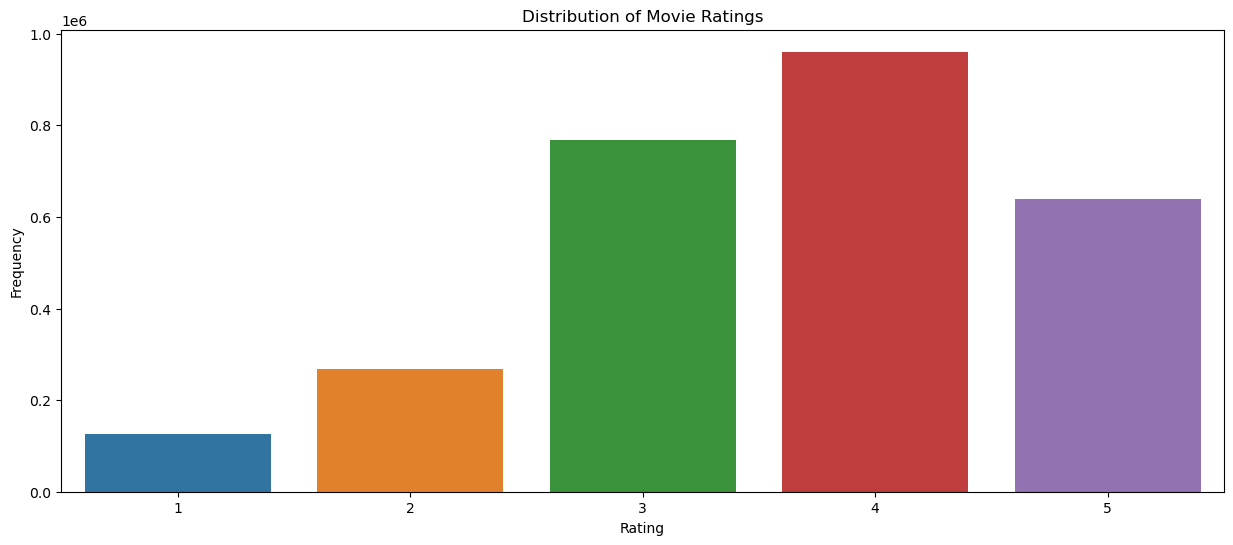

In [15]:
%matplotlib inline

plt.figure(figsize=(15, 6))

# Assuming 'Rating' is a column in your DataFrame
sns.countplot(data=df, x='Rating')

plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [5]:
# got error:ParserError: day is out of range for month: 2005-12-0
df.at[df.index[-1], 'Date'] = '2005-12-01'
df.at[df.index[-1], 'MovieId'] = 491.0

In [6]:
df.to_csv('Netflix_User_Ratings_2.csv',index=False)

<Figure size 1500x600 with 0 Axes>

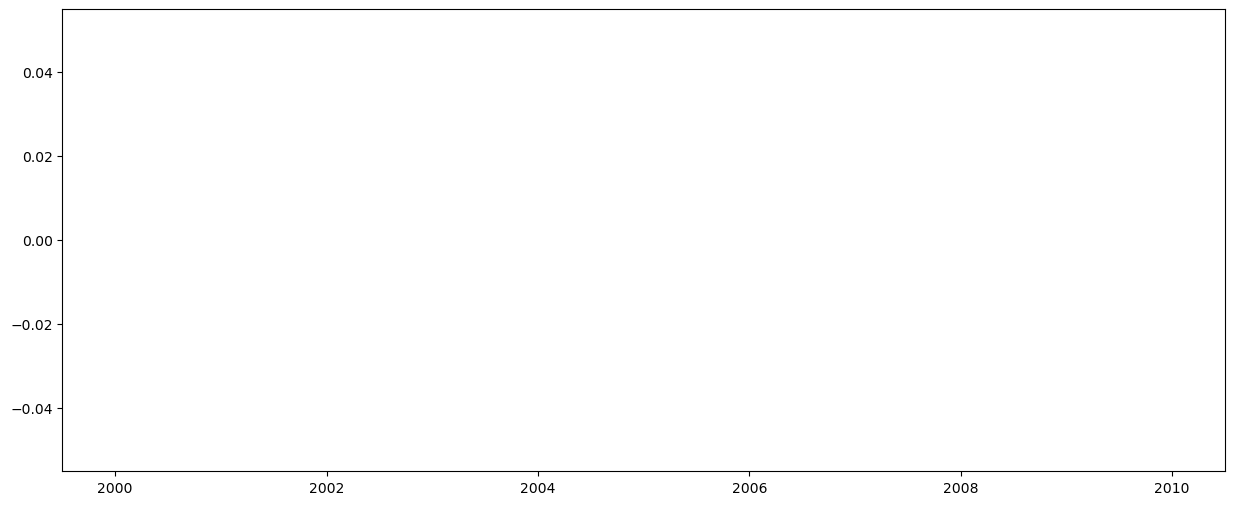

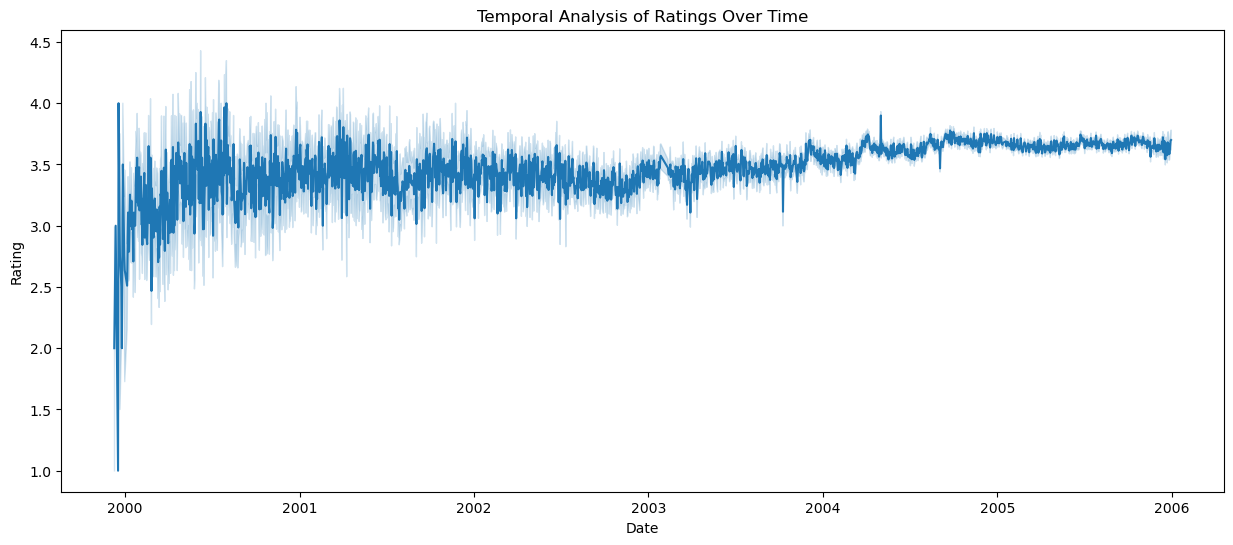

In [13]:
#Plot the trend of ratings over time to observe any patterns or trends
plt.figure(figsize=(15, 6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x='Date', y='Rating')
plt.title('Temporal Analysis of Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

In [ ]:
# import sqlite3
# table_name = 'netflix_ratings'
# conn = sqlite3.connect('netflix_data.db')
# df.to_sql(table_name, conn, index=False, if_exists='replace')
# query = "SELECT movieid, AVG(rating) as average_rating FROM netflix_ratings GROUP BY movieid ORDER BY average_rating DESC;"
# result = conn.execute(query).fetchall()
# for row in result:
#     print(row)
# conn.close()

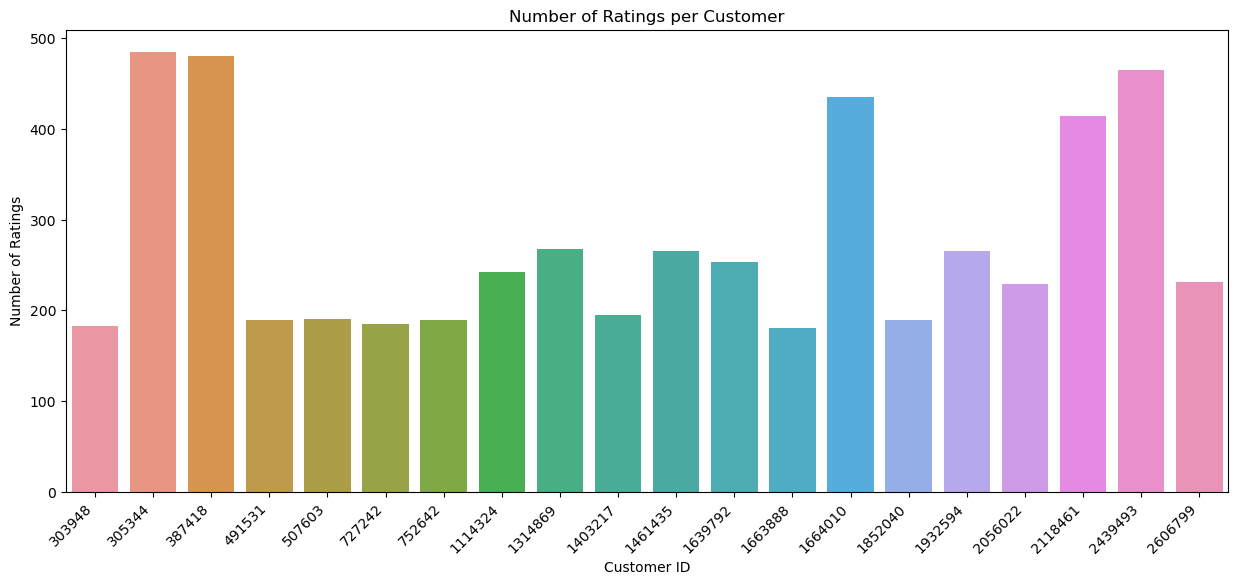

In [8]:
# Visualize the number of ratings given by each customer using a bar plot.
plt.figure(figsize=(15, 6))
customer_ratings_count = df.groupby('CustId')['Rating'].count().reset_index()
customer_ratings_count_2 = customer_ratings_count.sort_values(by='Rating', ascending=False)
top_n_customers = 20

ax = sns.barplot(data=customer_ratings_count_2.head(top_n_customers), x='CustId', y='Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.title('Number of Ratings per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Ratings')
plt.show()

In [10]:
df.head()

,CustId,Rating,Date,MovieId
0,1488844,3,2005-09-06,1.0
1,822109,5,2005-05-13,1.0
2,885013,4,2005-10-19,1.0
3,30878,4,2005-12-26,1.0
4,823519,3,2004-05-03,1.0


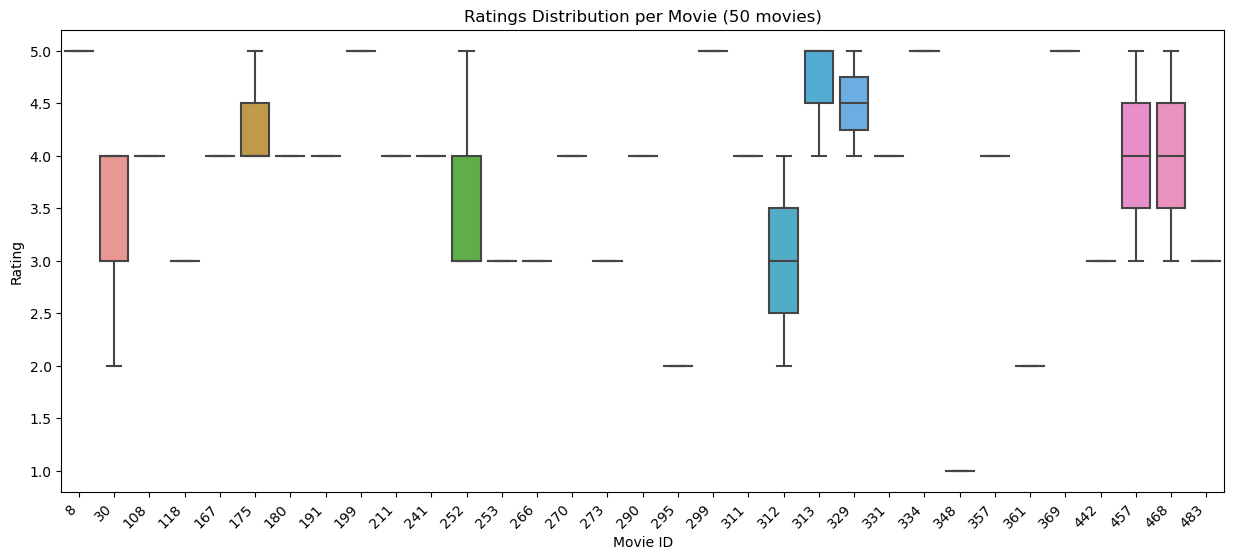

In [15]:
# Explore the distribution of ratings for each movie using a boxplot.
df['MovieId'] = df['MovieId'].astype(int)

sample_size = 50
sampled_df = df.sample(n=sample_size, random_state=42)

plt.figure(figsize=(15, 6))
ax = sns.boxplot(data=sampled_df, x='MovieId', y='Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.title('Ratings Distribution per Movie (50 movies)')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.show()

In [19]:
# # %%
# import pandas as pd

# df_movie_titles = pd.read_csv('data/movie_titles.csv', names=['Movie_Id', 'Release_Year', 'Title1', 'Title2','Title3','Title4'], encoding='ISO-8859-1', delimiter=',')
# df_movie_titles['Movie_Title'] = df_movie_titles['Title1'].fillna('') + ' ' + df_movie_titles['Title2'].fillna('') + ' ' + df_movie_titles['Title3'].fillna('') + ' ' + df_movie_titles['Title4'].fillna('')
# df_movie_titles['Release_Year'] = df_movie_titles['Release_Year'].astype('Int64')
# print(df_movie_titles.head())
# df_movie_titles.to_csv("movie_titles_recreated.csv", index=False)

In [22]:
#%%
df_movie_titles=pd.read_csv("movie_titles_recreated.csv")
print(df_movie_titles.iloc[939:954].to_string(index=False))
# %%

 Movie_Id  Release_Year                               Title1                 Title2 Title3 Title4                             Movie_Title
      940        1997.0                             Hercules                    NaN    NaN    NaN                             Hercules   
      941        1998.0                          Screw Loose                    NaN    NaN    NaN                          Screw Loose   
      942        1994.0                       The Pagemaster                    NaN    NaN    NaN                       The Pagemaster   
      943        2004.0  Dave Chappelle: For What It's Worth                    NaN    NaN    NaN  Dave Chappelle: For What It's Worth   
      944        1975.0                              Brother  Can You Spare a Dime?    NaN    NaN        Brother  Can You Spare a Dime?  
      945        1952.0             The Duel at Silver Creek                    NaN    NaN    NaN             The Duel at Silver Creek   
      946        2002.0           

In [23]:
# remove unnecessary cols - Title1, Title2, Title3, Title4
columns_to_remove = ['Title1', 'Title2', 'Title3', 'Title4']
df_mtitles = df_movie_titles.drop(columns=columns_to_remove)

In [24]:
df_mtitles.head()

,Movie_Id,Release_Year,Movie_Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [25]:
df_mtitles.shape

(17770, 3)

In [26]:
df.head()

,CustId,Rating,Date,MovieId
0,1488844,3,2005-09-06,1.0
1,822109,5,2005-05-13,1.0
2,885013,4,2005-10-19,1.0
3,30878,4,2005-12-26,1.0
4,823519,3,2004-05-03,1.0


In [28]:
df['MovieId'] = df['MovieId'].astype(int)


In [29]:
merged_df = pd.merge(df, df_mtitles, left_on='MovieId', right_on='Movie_Id', how='inner')

In [30]:
merged_df.shape

(2761101, 7)

In [31]:
merged_df.to_csv("NetFlix_User_Data_Combined.csv", index=False)

In [19]:
df = pd.read_csv("NetFlix_User_Data_Combined.csv")

In [20]:
df.head()

,CustId,Rating,Date,MovieId,Movie_Id,Release_Year,Movie_Title
0,1488844,3,2005-09-06,1,1,2003.0,Dinosaur Planet
1,822109,5,2005-05-13,1,1,2003.0,Dinosaur Planet
2,885013,4,2005-10-19,1,1,2003.0,Dinosaur Planet
3,30878,4,2005-12-26,1,1,2003.0,Dinosaur Planet
4,823519,3,2004-05-03,1,1,2003.0,Dinosaur Planet


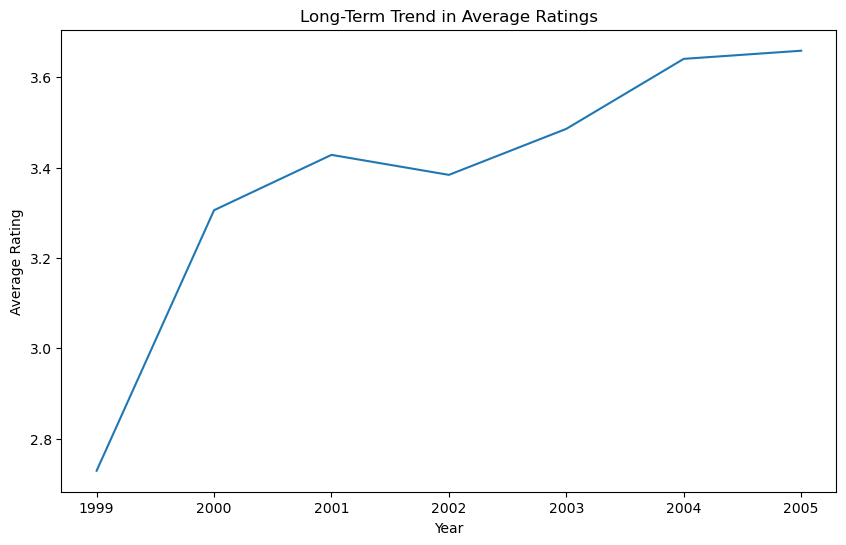

In [22]:
# Trend in average rating per year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

average_rating_by_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year)
plt.title('Long-Term Trend in Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

In [35]:
# Top Rated Movies
top_rated_movies = df.groupby('Movie_Title')['Rating'].mean().sort_values(ascending=False).head(10)
print('Top Rated Movies:')
print()
print(top_rated_movies)

Top Rated Movies:

Movie_Title
Lord of the Rings: The Return of the King: Extended Edition: Bonus Material       4.552000
Futurama: Monster Robot Maniac Fun Collection                                     4.301984
Sex and the City: Season 4                                                        4.289369
Elfen Lied                                                                        4.251880
Chappelle's Show: Season 1                                                        4.211192
Ghosts of Rwanda: Frontline                                                       4.195361
Aqua Teen Hunger Force: Vol. 1                                                    4.168650
Batman the Animated Series: Vol. 3                                                4.165468
Star Trek: Deep Space Nine: Season 5                                              4.160759
North by Northwest                                                                4.157901
Name: Rating, dtype: float64


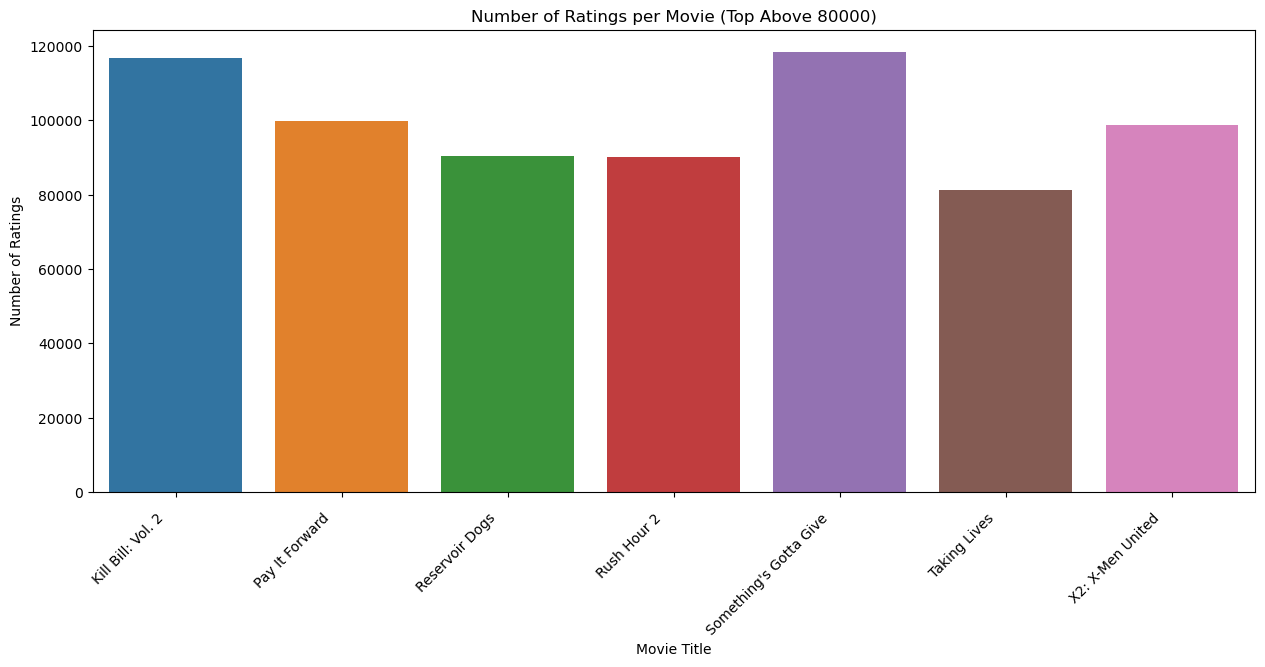

In [42]:
# Movie Popularity
plt.figure(figsize=(15, 6))
movie_ratings_count = df.groupby('Movie_Title')['Rating'].count().reset_index()

popular_movies = movie_ratings_count[movie_ratings_count['Rating'] > 80000]

ax = sns.barplot(data=popular_movies, x='Movie_Title', y='Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Number of Ratings per Movie (Top Above 80000)')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

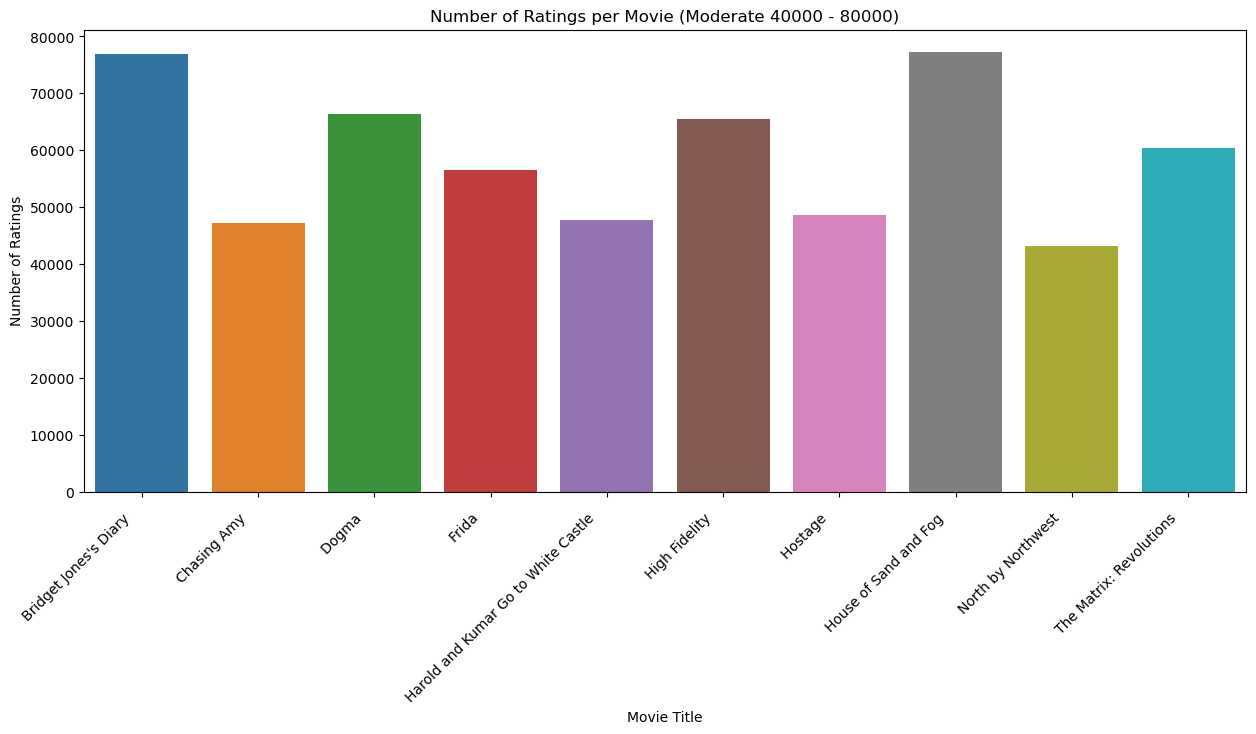

In [43]:
# Movie Popularity (Moderate)
plt.figure(figsize=(15, 6))
movie_ratings_count = df.groupby('Movie_Title')['Rating'].count().reset_index()

moderately_popular_movies = movie_ratings_count[(movie_ratings_count['Rating'] >= 40000) & (movie_ratings_count['Rating'] < 80000)]

ax = sns.barplot(data=moderately_popular_movies, x='Movie_Title', y='Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Number of Ratings per Movie (Moderate 40000 - 80000)')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

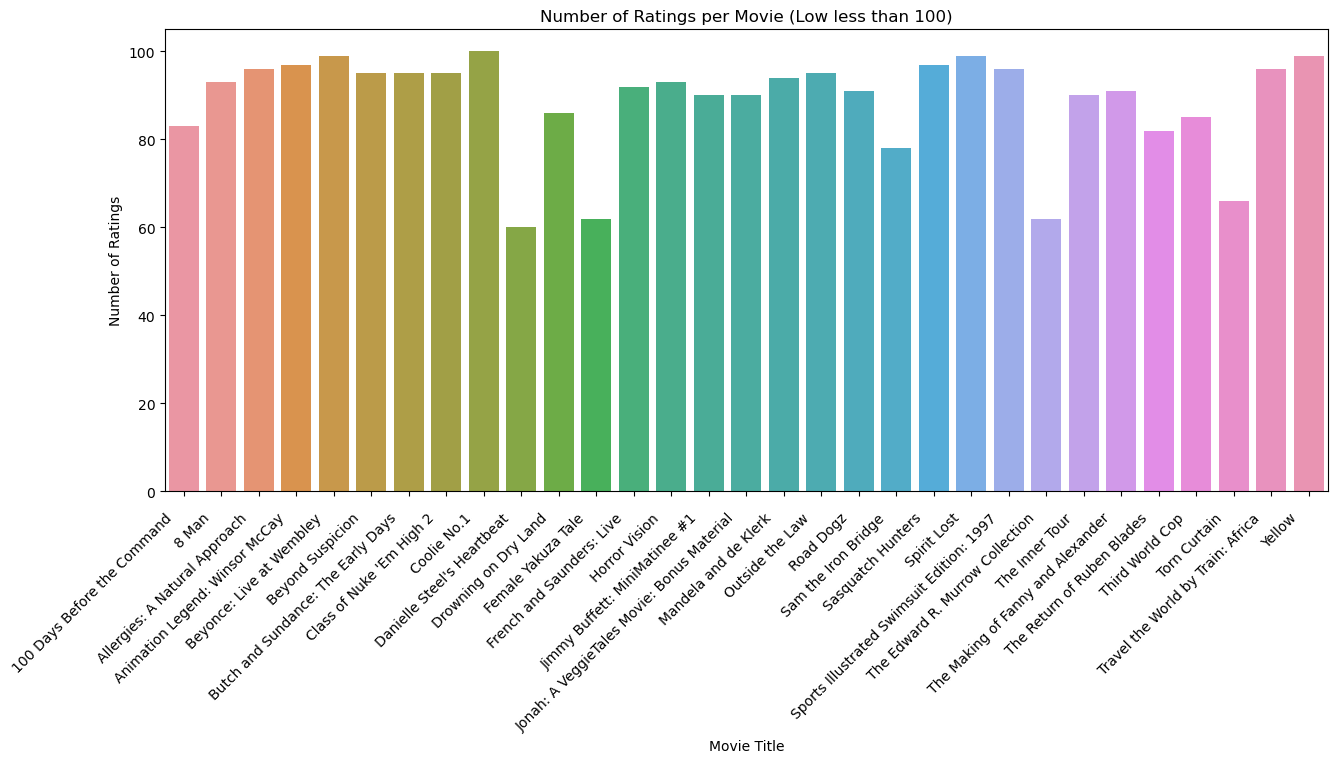

In [45]:
# Movie Popularity (Low)
plt.figure(figsize=(15, 6))
movie_ratings_count = df.groupby('Movie_Title')['Rating'].count().reset_index()

low_popular_movies = movie_ratings_count[movie_ratings_count['Rating'] <= 100]

ax = sns.barplot(data=low_popular_movies, x='Movie_Title', y='Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Number of Ratings per Movie (Low less than 100)')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

In [46]:
df.head()

,CustId,Rating,Date,MovieId,Movie_Id,Release_Year,Movie_Title,Year
0,1488844,3,2005-09-06,1,1,2003.0,Dinosaur Planet,2005
1,822109,5,2005-05-13,1,1,2003.0,Dinosaur Planet,2005
2,885013,4,2005-10-19,1,1,2003.0,Dinosaur Planet,2005
3,30878,4,2005-12-26,1,1,2003.0,Dinosaur Planet,2005
4,823519,3,2004-05-03,1,1,2003.0,Dinosaur Planet,2004


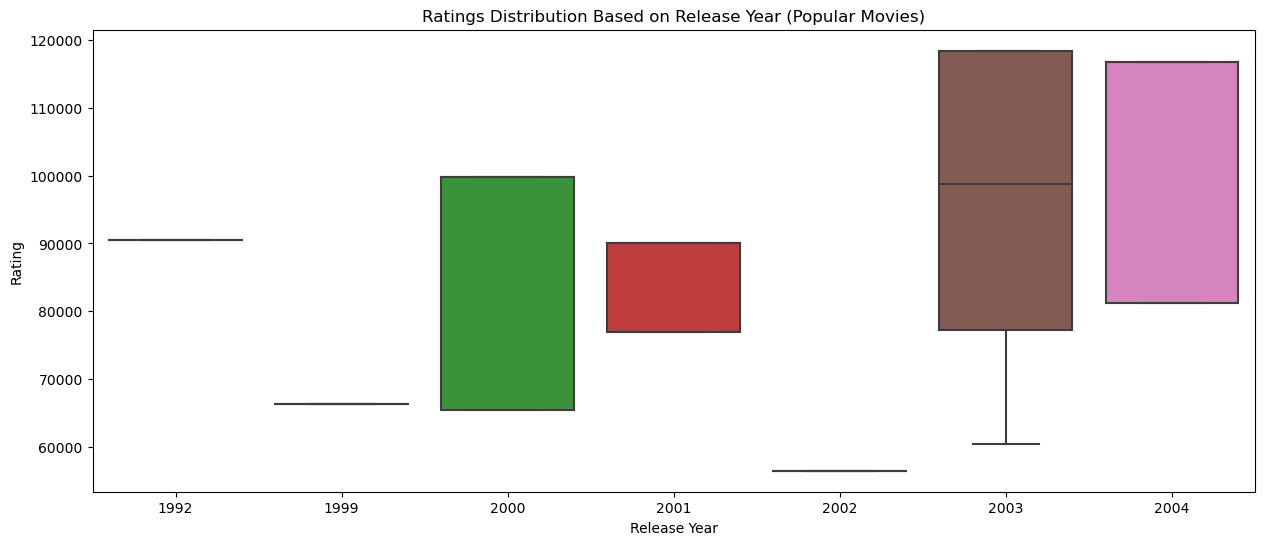

In [51]:
plt.figure(figsize=(15, 6))

movie_ratings_count = df.groupby('MovieId')['Rating'].count().reset_index()
popular_movies = movie_ratings_count[movie_ratings_count['Rating'] > 50000]
df['Release_Year'] = df['Release_Year'].astype(int)

# Merge with the original DataFrame to get the release year information
popular_movies_info = pd.merge(popular_movies, df[['MovieId', 'Release_Year']], on='MovieId', how='left')

sns.boxplot(data=popular_movies_info, x='Release_Year', y='Rating')
plt.title('Ratings Distribution Based on Release Year (Popular Movies)')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()